# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


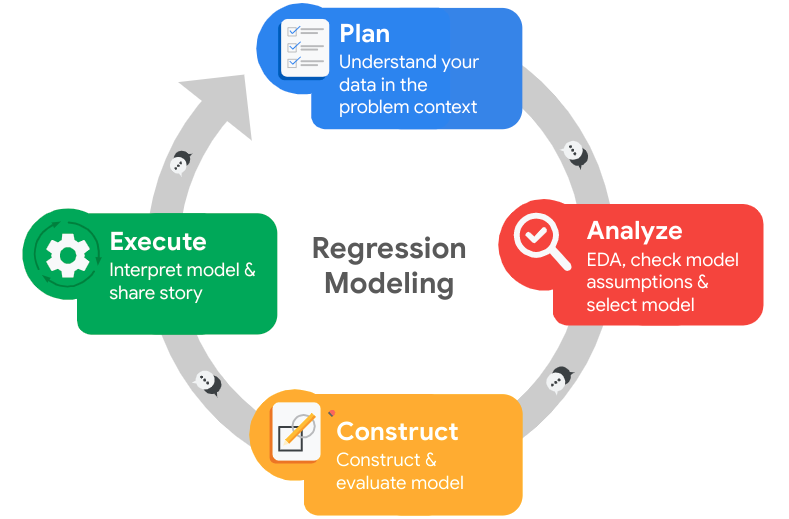

# Salifort Motors Workforce Analysis: Employee Turnover Forecast

## Background Infomation

Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.

As a data specialist working for Salifort Motors, you have received the results of a recent employee survey. The senior leadership team has tasked you with analyzing the data to come up with ideas for how to increase employee retention. To help with this, they would like you to design a model that predicts whether an employee will leave the company based on their department, number of projects, average monthly hours, and any other data points you deem helpful.

## Step Approach

We will use follow PACE framework for this projects:

### Plan

- **Objective:** To develop a predictive model that forecasts employee turnover at Salifort Motors based on key factors such as department, number of projects, average monthly hours, and other relevant data points.
- **Scope:** The model will focus on classifying employees into categories of 'likely to leave' or 'likely to stay'. Additional parameters like employee satisfaction, experience, and performance ratings may be considered.
- **Data Requirements:** For the data set provided by Google, for the column explanation, see Course7 -> README.
- **Stakeholders:** Senior leadership team, HR department, departmental managers, etc.

### Analyze

- **Data Cleaning:** Address missing values, outliers, and duplicates in the given data, ensure data types are appropriate for analysis.
- **Data Processing:** Transform categorical data into a format suitable for modeling.
- **Exploratory Data Analysis (EDA):** Conduct an initial analysis to understand the distribution of key variables, identify patterns, and detect any anomalies or interesting correlations.
- **Feature Selection:** Determine which variables are most relevant for predicting employee turnover. This involve statistical tests and correlation analysis.

### Construct

- **Model Selection:**
    - Decision Tree model: Justify the choice based on the model's simplicity, interpretability, and suitability for the data.
    - Random Forest model: Expand the predictive capacity by leveraging an ensemble method that improves accuracy and controls overfitting better than a single decision tree.
    - XGBoost model: Implement this advanced gradient boosting algorithm for its efficiency, effectiveness, and ability to handle a wide variety of data science problems.
    - K Means: Employ K-means clustering to identify patterns of employee engagement.
 - **Validation:**
    - For the Decision Tree, continue to split the data into training and testing sets to validate the model's performance. Use metrics like K-Fold Cross-Validation and GridSearch for optimization.
    - For the Random Forest and XGBoost models, additionally apply techniques such as feature importance and parameter tuning to refine the models and improve accuracy.
- **Parameter Tuning:** 
    - Use GridSearchCV for the Random Forest to explore a wide range of combinations and identify the best hyperparameters for the ensemble.
    - For XGBoost, we can apply a more targeted approach with RandomizedSearchCV, focusing on key parameters like learning rate, max depth, and number of estimators.


### Execute

- **Results Interpretation:** Analyze the results to identify the most significant predictors of employee turnover. Understand how different variables interact and influence the outcome.
- **Conclusion and Recommendations:** Draw conclusions based on the model's findings. Propose actionable recommendations for reducing employee turnover.
- **Feedback and Iteration:** Provide feedback to stakeholders to make the company better - reduce the employee churn rate. 

### What's next...
- **Performance Evaluation:** Evaluate the Decision Tree model to pinpoint where enhancements are needed.
- **Model Expansion:** Integrate advanced models such as Random Forest and XGBoost, which offer a more robust framework for handling complex datasets and feature interactions.
- **Deployment Preparation:** Prepare the refined models for deployment, ensuring they are tuned for optimal performance in a production environment.




### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [30]:
# Analysis
import numpy as np
from numpy import loadtxt
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, \
precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.calibration import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import randint
import xgboost as xgb
from xgboost import XGBClassifier

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [31]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [32]:
# Gather basic information about the data
### YOUR CODE HERE ###

df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [33]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [34]:
# Display all column names
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
# Rename columns as needed

def clean_column_names(df):
    df.columns=(
    
    df.columns
        .str.lower()
        .str.strip()
        .str.replace(r"[^\w\s]", "", regex=True)
        .str.replace(r"\s+", "_", regex=True)
     )
    return df
df0=clean_column_names(df0)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [36]:
# Check for missing values
df0.isna().any(axis=1).sum()

0

### Check duplicates

Check for any duplicate entries in the data.

In [37]:
# Check for duplicates
df0.duplicated().sum()

3008

In [38]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [39]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1=df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

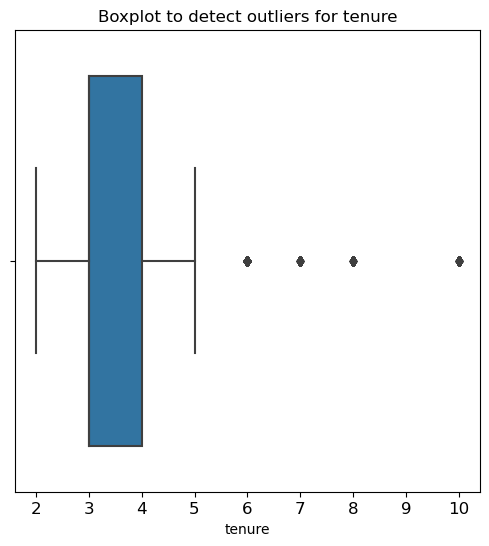

In [40]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
df1=df1.rename(columns={'time_spend_company':'tenure'})
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [41]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

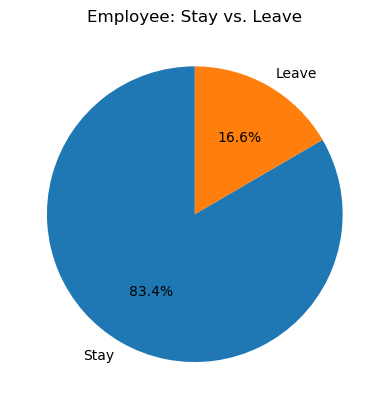

In [42]:
count=df1['left'].value_counts(normalize=True)
plt.pie(count, labels=["Stay", "Leave"], autopct="%1.1f%%", startangle=90)
plt.title("Employee: Stay vs. Leave");

Only about 16% of people leave, which seems normal.

The question we are trying to find out is: Why are employees leaving?

Here is some approach:

__Satisfaction and Performance:__ Analyze the interaction between satisfaction_level and last_performance_rating with respect to has_left_company.

__Tenure and Promotion:__ Look at years_at_company alongside promoted_in_last_5_years to see if longer-tenured employees without promotions are more likely to leave.

__Salary Level and Workload:__ Investigate how salary_level interacts with avg_monthly_hours to influence turnover.

__Projects by Department:__ Explore the num_of_projects assignments across departments and their impact on employee turnover.

__Comprehensive Analysis:__ In the end, we will use a heatmap to represent all relationships.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

2.1 __satisfaction and performance__

analyse the relationship between performance and satisfaction with respect to 'left' company

In [43]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


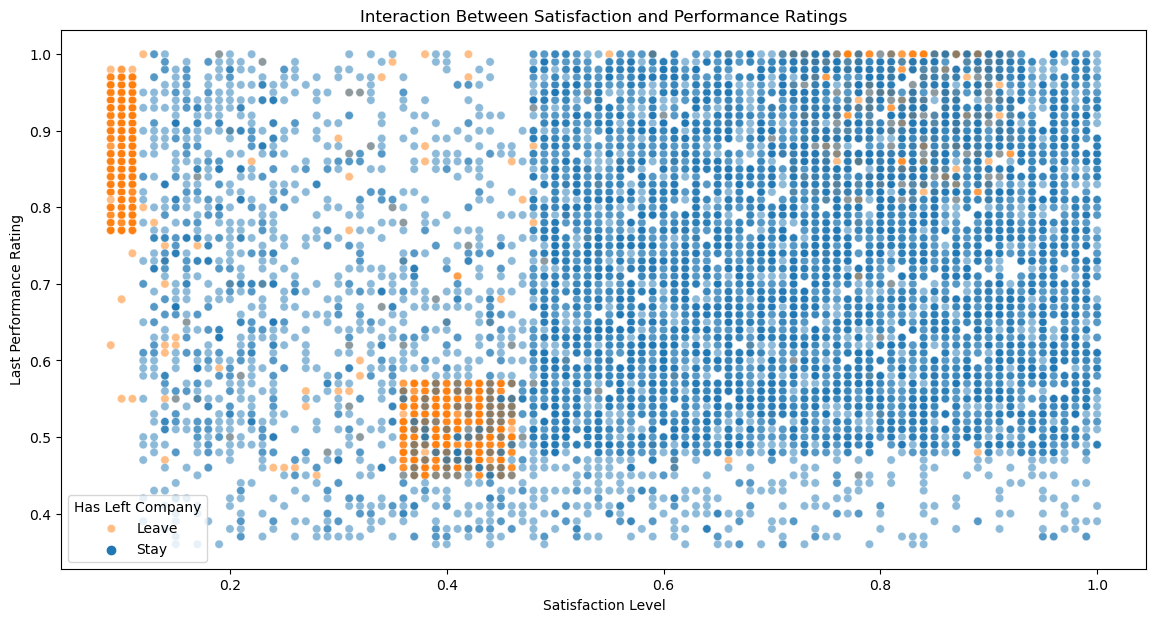

In [44]:
# Create a plot as needed

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df1, x="satisfaction_level", y="last_evaluation", hue="left", alpha=0.5)
plt.title("Interaction Between Satisfaction and Performance Ratings")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Performance Rating")
plt.legend(labels=["Leave", "Stay"], title="Has Left Company")
plt.show();


From the graph:

__High performance but low satisfaction:__ The first block in the upper left corner shows that even well-performing employees may choose to leave if they are not satisfied. This may suggest that job satisfaction factors other than performance, such as work-life balance, recognition, or work environment, may contribute to turnover.

__Low Performance and Low Satisfaction:__ The second block indicates a group of employees with low satisfaction and low performance. This is simpler because low job satisfaction and poor performance are both common reasons why employees leave an organization.

__Retention Strategies:__ For the first group, strategies to increase job satisfaction may be effective for retention even without focusing on performance improvement. For the second group, interventions may need to address performance support and job satisfaction.

__Further analysis:__ These observations may lead to further analysis. For example, examine what specific aspects of job satisfaction a high-performing employee who left the company lacked, or understand the reasons behind the poor performance of a second group of employees.


__average_monthly_hours vs number_project__
 
I wantt to see avergae_monthly_hours distribution for number_project, comparing the distributions of employees who stayed versus those who left using boxplot. however since using only boxblot could be deceiving without the context of how big the sample sizes that they represent are, I will also plot a stacked histogram to visualize the distribution of number_project for those who stayed and those who left



In [45]:
df1.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


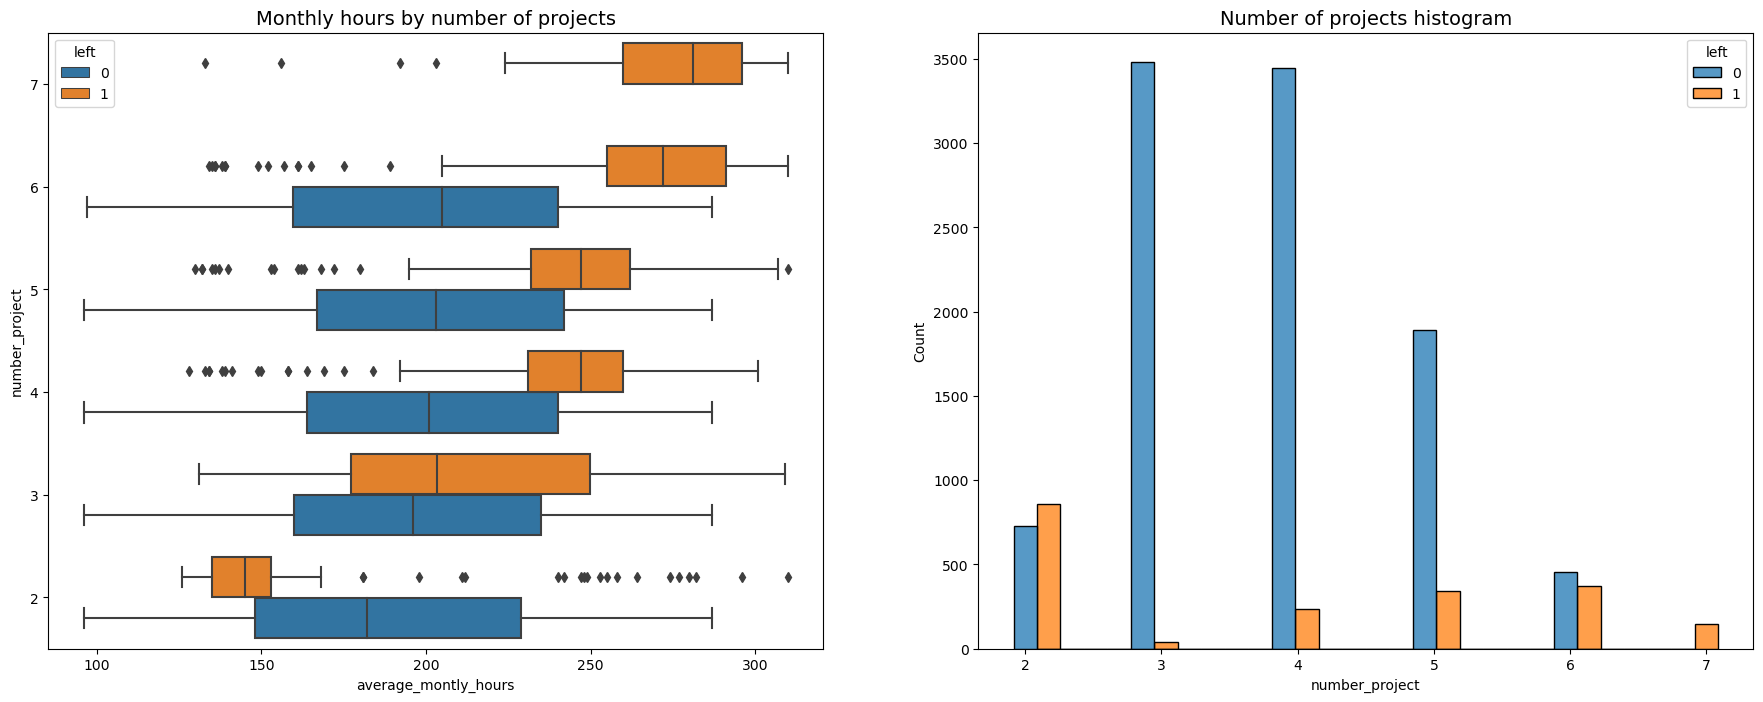

In [46]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='average_montly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.



In [47]:

df1[df1['number_project']==7]['left'].value_counts()
#this confirms that all the employees with 7 projects has left none of th employee with 7 projects has stayed

left
1    145
Name: count, dtype: int64

next, I will examine average_montly_hours vs satisfaction as the increasing hours could increase their salary and thus affect employee satisfaction

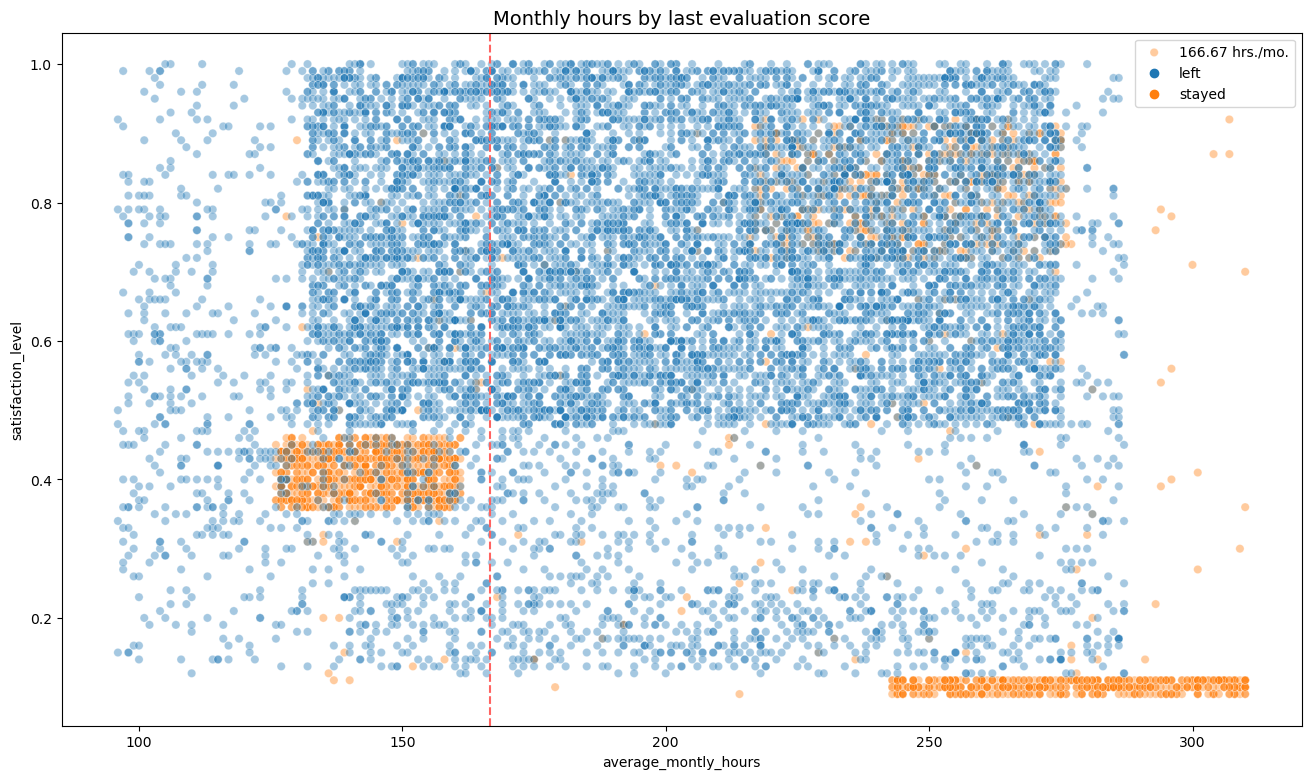

In [48]:


plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_montly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. or they are likely earning less per hour or they want more hours to work to make more money 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 



__satisfaction vs tenure__

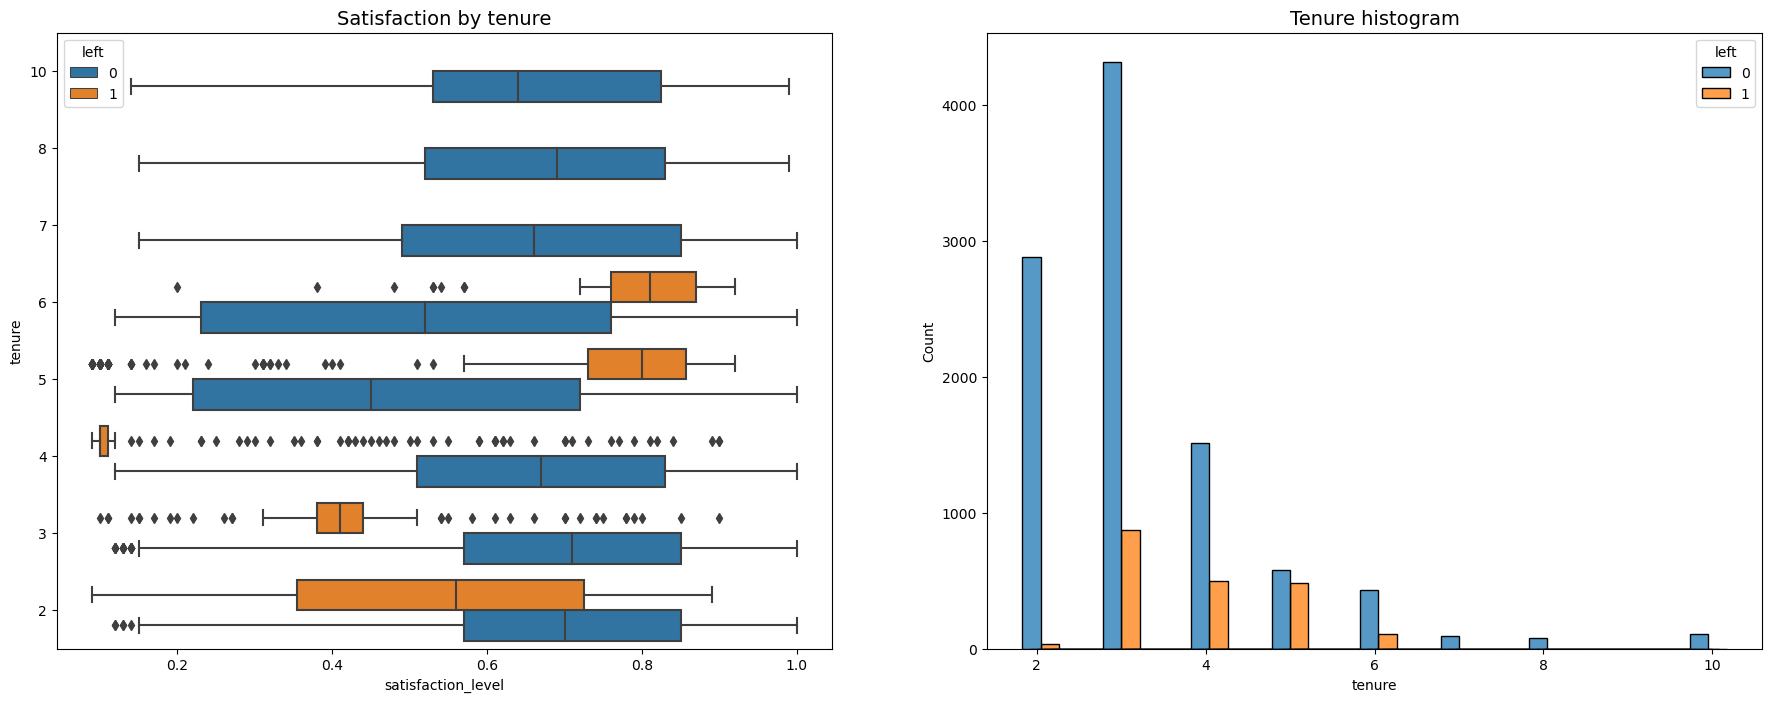

In [49]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations you could make from this plot.

Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.
As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

__Tenure and promotion__

Look at years_at_company alongside promoted_in_last_5_years to see if longer-tenured employees without promotions are more likely to leave.

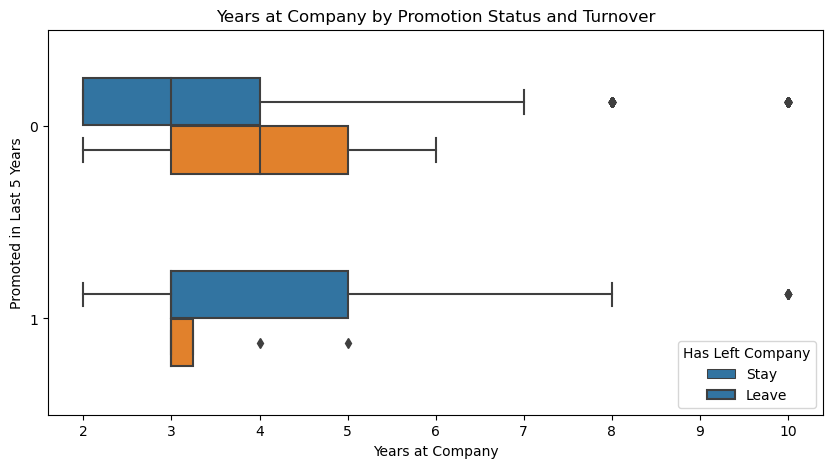

In [50]:
# Create a plot as needed
plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(x="tenure", y="promotion_last_5years", hue="left", data=df1, width=0.5, orient="h")
plt.title("Years at Company by Promotion Status and Turnover")
plt.xlabel("Years at Company")
plt.ylabel("Promoted in Last 5 Years")
plt.legend(labels=["Stay", "Leave"], title='Has Left Company')
plt.show();

__Non-Promoted Employees:__ For those who have not been promoted, the fact that employees who left had a higher median tenure than those who stayed could suggest that without the prospect of promotion, they might be willing to stay up to a certain point, after which they may start looking for better opportunities elsewhere.

__Promoted Employees:__ Among those who have been promoted, it seems that employees tend to leave after a relatively short period post-promotion. This could imply that promotions may no`t be sufficient to retain staff in the long term, or it could indicate a 'promotion paradox' where employees leave for external opportunities once they have been promoted.

__Post-Promotion Turnover:__ For promoted employees who leave, the organization might need to investigate if the reasons are related to the roles they are promoted into, dissatisfaction with the new position, or if the promotion encourages them to seek even more advanced opportunities outside the company.

__amount of salary__

Investigate how salary_level interacts with avg_monthly_hours to influence turnover.



In [51]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


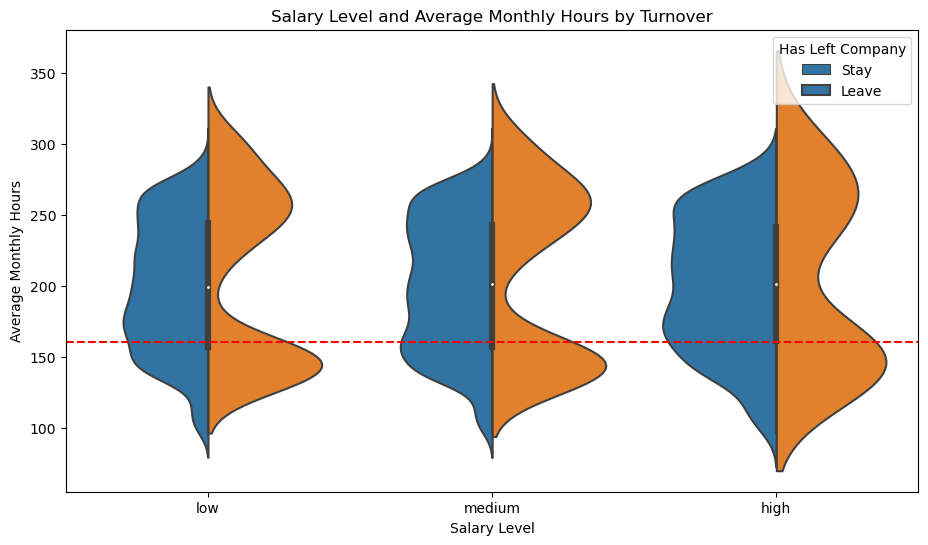

In [52]:
# Create a plot as needed
plt.figure(figsize=(11, 6))
sns.violinplot(x="salary", y="average_montly_hours", hue="left", data=df1, split=True)
plt.axhline(y=160, color="r", linestyle="--", label="Average 160hrs/month")
plt.title("Salary Level and Average Monthly Hours by Turnover")
plt.xlabel("Salary Level")
plt.ylabel("Average Monthly Hours")
plt.legend(labels=["Stay", "Leave"], title="Has Left Company")
plt.show()

__Workload at different salary levels:__ The shapes of the distributions for "low" and "medium" salary levels are similar, indicating that employees in these categories tend to work similar ranges of hours. This may suggest that wages are not proportional to hours worked, which may factor in employee dissatisfaction and turnover.

__High-wage hours worked:__ "High" pay levels also have a similar distribution shape, meaning that even high-wage employees work a similar range of hours as low-wage employees.

__Tolerance for high workloads:__ Some employees may be more tolerant and thrive under higher workloads. Their reasons for staying include high job satisfaction, commitment to the company, or external factors such as what they feel is adequate pay after overtime.

__Need for in-depth analysis:__ To understand why some employees stay despite heavy workloads, it's essential to conduct an in-depth analysis to identify factors contributing to their satisfaction and retention.

__project by departement__

Explore the num_of_projects assignments across departments and their impact on employee turnover.

In [53]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


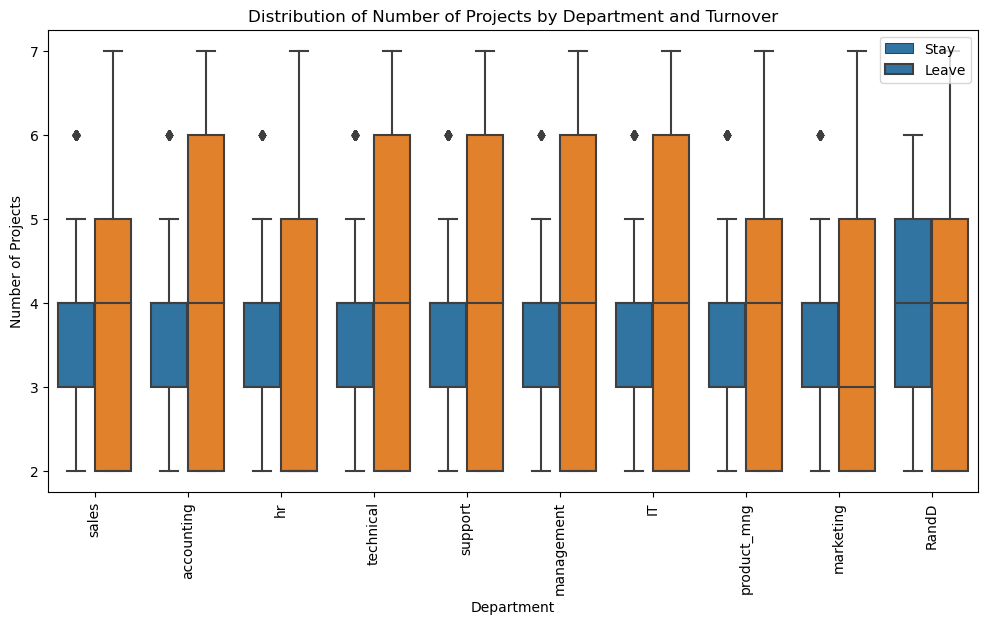

In [54]:
# Create a plot as needed
plt.figure(figsize=(12, 6))
sns.boxplot(x="department", y="number_project", hue="left", data=df1)

plt.xticks(rotation=90)  
plt.title("Distribution of Number of Projects by Department and Turnover")
plt.xlabel("Department")
plt.ylabel("Number of Projects")
plt.legend(labels=["Stay", "Leave"], loc="upper right")
plt.show()

__Higher Median Projects for Leavers:__ There is a noticeable trend where the median number of projects for employees who left the company is higher than for those who stayed.
Project Range for Leavers: Employees who left the company have a wider range of project involvement, with some working on as few as 2 projects and others on as many as 7.

__Consistent Median for Stayers:__ Employees who stayed seem to have a consistent median number of projects across departments, generally between 3 and 4. This consistency might indicate a balanced workload is maintained for retained employees.

__High-Project Turnover:__ Particularly noticeable is that almost all employees who worked on 5 or more projects have left, suggesting that those who are highly engaged in work or possibly overworked are more prone to leaving.

__Department Impact:__ While the department doesn't seem to be the main factor in project count for those who stayed, it appears to influence those who left. However, the trend of leavers having more projects is consistent across departments.

__RandD Department Exception:__
The RandD department stands out as an exception, where the number of projects does not differ much between those who have left and those who have stayed.
Given the insights from the data, it appears that the choice of an employee to leave the company is not significantly influenced by the department they work in. The pattern of turnover is consistent across different departments, suggesting that departmental factors may not be the primary drivers of employee departure. Consequently, we can opt to exclude the department column from our predictive modeling as it may not provide substantial predictive power for employee turnover.


Given the insights from the data, it appears that the choice of an employee to leave the company is not significantly influenced by the department they work in. The pattern of turnover is consistent across different departments, suggesting that departmental factors may not be the primary drivers of employee departure. Consequently, we can opt to exclude the department column from our predictive modeling as it may not provide substantial predictive power for employee turnover.

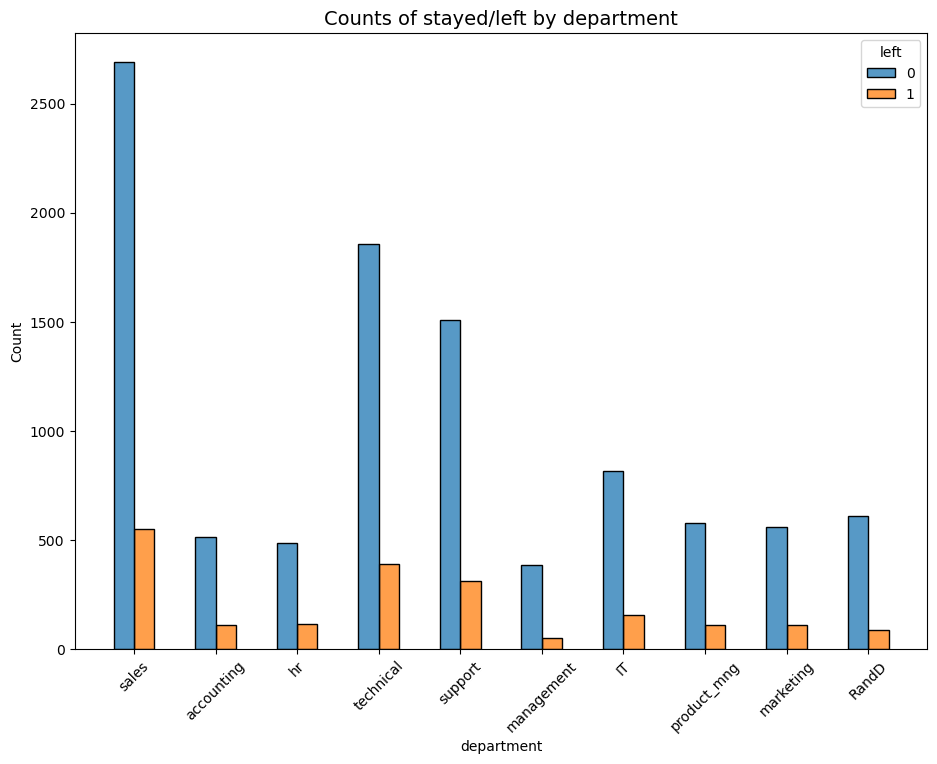

In [55]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);


__Comprehensive analysis__

we will use a heatmap to represent all relationship

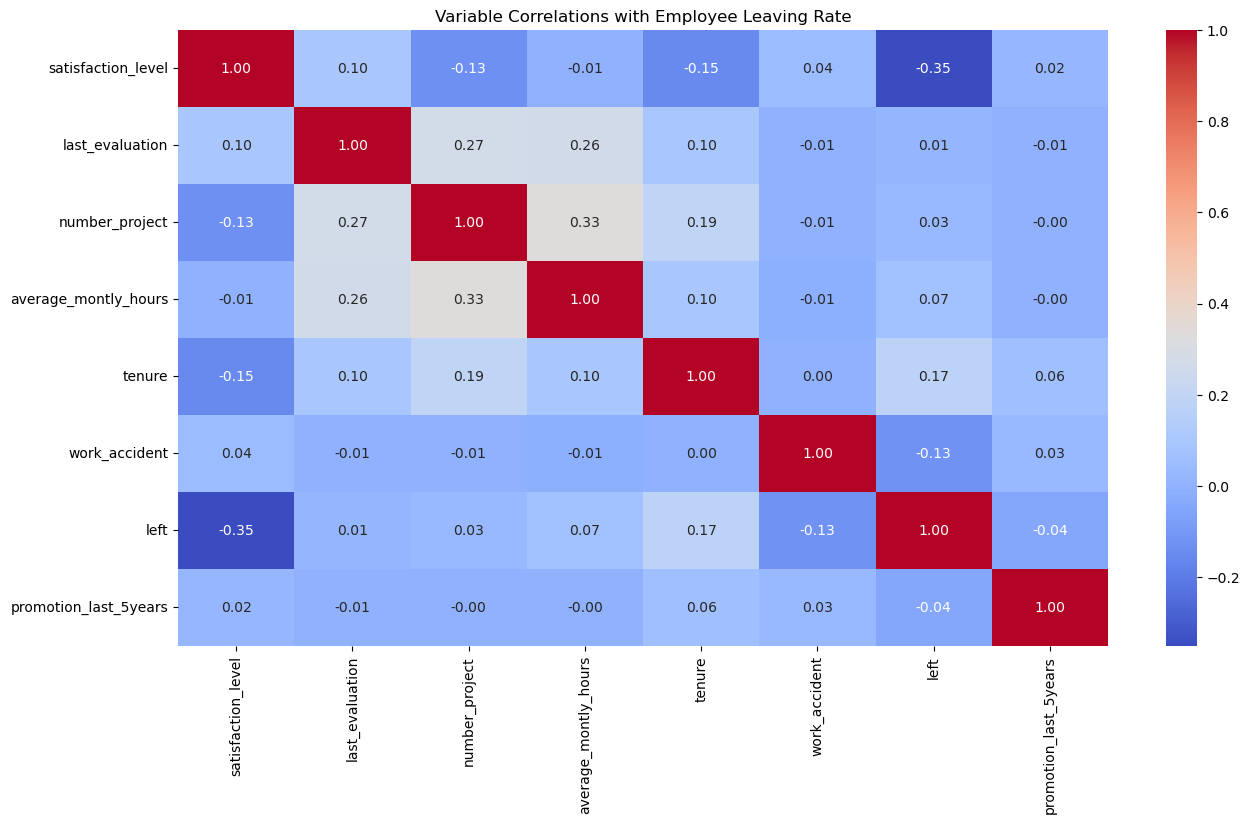

In [56]:
# Create a plot as needed
numeric_df = df1.select_dtypes(include=["int64", "float64"])

# Create heatmap to show all variable relationship and leave the company
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True,fmt=".2f", cmap="coolwarm", cbar=True)
heatmap.set_title("Variable Correlations with Employee Leaving Rate");

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

2.4 Graph Interpretation
Employees may decide to leave a company for several reasons. Based on an analysis of overall trends and discussions, here are some potential reasons why employees may choose to leave:

__Lack of job satisfaction:__ If employees feel that their job could be more fulfilling or that their job could effectively utilize their skills, they may seek a more satisfying position elsewhere.

__Lack of career advancement:__ A lack of advancement opportunities or feeling stuck in the same role can lead to frustration and a decision to leave to pursue career advancement.

Work-life balance: Overwork and stress without adequate breaks can lead to burnout. If employees feel their work-life balance is unsustainable, they may leave.

__Compensation issues:__ If employees feel their jobs are unfairly compensated, especially compared to industry standards, they may leave for higher-paying opportunities.

__Excessive Workload:__ Our analysis indicates that employees handling a high number of projects, particularly those tackling five or more, are more likely to leave. This suggests that an excessive workload could be a significant factor in their decision to seek employment elsewhere.

Next, we will use a building model using decision tree to predict the depth of reasons why employees choose to leave and how to prevent them from leaving the company.

### Insights

Employees seem to be leaving the company due to ineffective management. High turnover is linked to long working hours, heavy workloads, and overall low job satisfaction. Working extended hours without receiving promotions or positive performance evaluations can be demotivating. A significant number of employees at this company are likely experiencing burnout. Additionally, those who have been with the company for more than six years are less likely to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


__Model Selection:__

 * __Decision Tree model:__ Justify the choice based on the model's simplicity, interpretability, and suitability for the data.
 * __Random Forest model:__ Expand the predictive capacity by leveraging an ensemble method that improves accuracy and controls overfitting better than a single decision tree.
 
* __XGBoost model:__ Implement this advanced gradient boosting algorithm for its efficiency, effectiveness, and ability to handle a wide variety of data science problems.

* __K Means:__ Employ K-means clustering to identify patterns of employee engagement.

__Validation:__

* For the Decision Tree, continue to split the data into training and testing sets to validate the model's performance. Use metrics like K-Fold Cross-Validation and GridSearch for optimization.
* For the Random Forest and XGBoost models, additionally apply techniques such as feature importance and parameter tuning to refine the models and improve accuracy.

__Parameter Tuning:__

Use GridSearchCV for the Random Forest to explore a wide range of combinations and identify the best hyperparameters for the ensemble.
For XGBoost, we can apply a more targeted approach with RandomizedSearchCV, focusing on key parameters like learning rate, max depth, and number of estimators.

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

the goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).


### Identify the types of models most appropriate for this task.

since the variable to be predicted (employee leaving a company) is categorical, I will build logistic regression and also tree based model to compare which one is more suitable

### Modeling 1: Logistic regression

This part covers the modeling with logistic regression

Before applying Logistic Regression, we first convert the two categorical variables (department,salary) into numerical values, as the model requires numerical inputs for computation.

In [57]:
### YOUR CODE HERE ###

df_encoded=df1.copy()

df_encoded['salary']=df_encoded['salary'].map({'low':0,'medium':1,'high':2})

df_encoded = pd.get_dummies(df_encoded, drop_first=False)
df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,False,False,False,False,True,False,False,False,False,False
11996,0.74,0.95,5,266,10,0,0,1,2,False,False,False,False,True,False,False,False,False,False
11997,0.85,0.54,3,185,10,0,0,1,2,False,False,False,False,True,False,False,False,False,False
11998,0.33,0.65,3,172,10,0,0,1,2,False,False,False,False,False,True,False,False,False,False


Next, we are going to plot a heatmap and see the relationship between each features

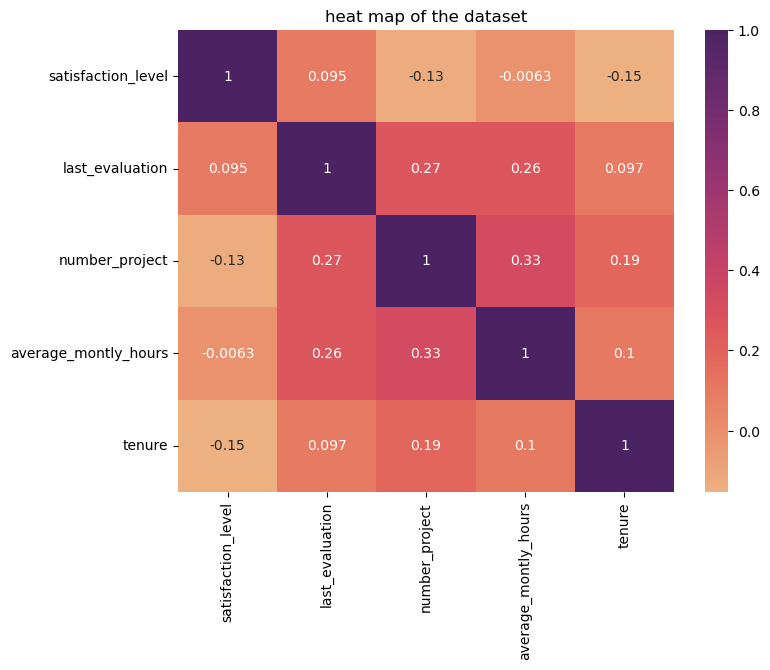

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'tenure']].corr(),annot=True,cmap='flare')
plt.title("heat map of the dataset")
plt.show()

logistic regression is highly sensetive to outliers. so we have to remove the outliers from the tenure columns that we found earlier

In [59]:
df2 = df_encoded[(df_encoded['tenure'] >= lower_limit) & (df_encoded['tenure'] <= upper_limit)]
df2


,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,False,False,False,False,False,False,False,True,False,False
11986,0.48,0.50,5,142,4,0,0,0,1,True,False,False,False,False,False,False,False,False,False
11987,0.19,0.79,4,229,4,0,0,0,1,False,False,False,False,False,False,True,False,False,False
11992,0.62,0.85,3,237,3,1,0,0,1,True,False,False,False,False,False,False,False,False,False


In [60]:
y=df2['left']
X=df2.drop(['left'],axis=1)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)


Next, we test the logisticregression

In [63]:
y_pred=log_clf.predict(X_test)


we then need to evaluate the correctness of out logisticregression model. we can do this by performing a confusion matrix

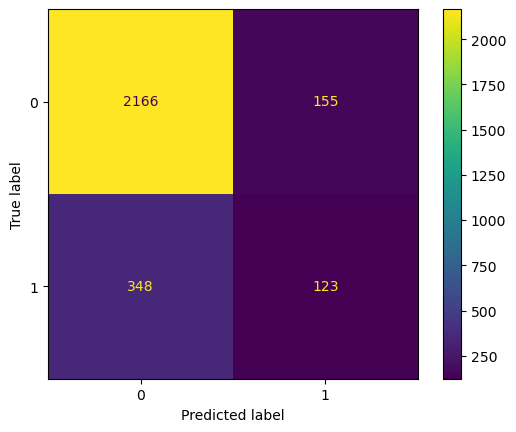

In [64]:
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cm,display_labels=log_clf.classes_)
display.plot(values_format='')

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

next, I will performe a classification report. However, before doing that I want to chech for the class imbalance as When the dataset is imbalanced, the model may appear to perform well overall, but it could be biased towards the majority class, leading to misleading metrics.

In [65]:
df2['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

As can be see there is 83%-17% split approximatily. It is not balanced but at the same time it is not too imbalanced so we can go ahead and perform classification report

In [66]:
# Create classification report for logistic regression model
target_names = ['stay', 'leave']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        stay       0.86      0.93      0.90      2321
       leave       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

# mode2: Tree-based model

In the following model we will less how the model performs under randomforst classification and decsion tree classification

In [67]:
y=df_encoded['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [68]:
X = df_encoded.drop(['left'], axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


we then split the data into training,validation and testing 

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

# Decision-tree model

In [70]:
model=DecisionTreeClassifier(random_state=0)


In [71]:
cv_params = {
    'max_depth': [2, 4, 8, None],  
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 10, 20],
}
scoring=['precision','accuracy','recall','f1','roc_auc']
tree=GridSearchCV(model,cv_params,scoring=scoring,cv=4,refit='roc_auc')

tree

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 8, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 10, 20]},
             refit='roc_auc',
             scoring=['precision', 'accuracy', 'recall', 'f1', 'roc_auc'])

we then fit the decision tree model to the training data

In [72]:
tree.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 8, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 10, 20]},
             refit='roc_auc',
             scoring=['precision', 'accuracy', 'recall', 'f1', 'roc_auc'])

Next, we identify the trees best parameter using best_params_

In [73]:
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [74]:
tree.best_score_

0.9710926810117475

Next, I want to a function that extracts all the scors from the grid search

In [84]:
def make_results(model_name:str, model_object, metric:str):
    
    

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [85]:
tree1_cv_results = make_results('decision tree cv', tree, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.926282,0.917764,0.921857,0.974145,0.971093


As it can be see all of the above scores are a strong indicatores of good model performance 

But a decision tree is prone to overfitting so since randomforst avoids overfitting by incorporating multiple trees to make prediction, we could construct a random forest model next

# Random forest model

In [86]:
rf=RandomForestClassifier(random_state=0)

In [112]:
cv_params = {
    'max_depth': [2, 4, 8, 10, None],
    'max_features': [1.0],  # or a range of values, like [0.5, 0.7, 1.0]
    'max_samples': [0.7, 1.0],
    'min_samples_split': [2, 5, 10]  # Add a value or list here
}

# Assign a dictionary of scoring metrics to capture
scoring=['roc_auc', 'f1', 'precision', 'accuracy', 'recall']  # List

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [114]:
rf1.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 8, 10, None],
                         'max_features': [1.0], 'max_samples': [0.7, 1.0],
                         'min_samples_split': [2, 5, 10]},
             refit='roc_auc',
             scoring=['roc_auc', 'f1', 'precision', 'accuracy', 'recall'])

In [135]:
import os
import pickle

import pickle as pk

# Create a folder in the home directory (which usually has write permissions)
path = os.path.expanduser('~/forest/')

# Create the directory (and any parent directories if needed)
os.makedirs(path, exist_ok=True)

print(f"Directory '{path}' created successfully.")


Directory '/home/4a3ad1b2-d2b3-46de-ae67-5fd6f5064188/forest/' created successfully.


In [136]:
def write_pick(path,model_object:str,save_as:str):
    with open(path+save_as+'.pickle','wb') as to_write:
        pickle.dump(model_object,to_write)
        
    

In [137]:
def read_pickle(path, saved_model_name:str):
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

using the functions above I want to write the model to pick and read form it 

In [138]:
write_pick(path,rf1,'rf1')

In [139]:
rf1=read_pickle(path,'rf1')

In [140]:
rf1.best_score_

0.9784464671701812

In [141]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.926282  0.917764  0.921857  0.974145  0.971093
              model  precision    recall       F1  accuracy       auc
0  random forest cv   0.923253  0.920131  0.92161  0.974041  0.978446


the evaluation scores of random forst model are far better than that of decision tree model, indicating that random forest outperfored decision tree model

#  XGBOOST

since I have already done spliting the data,I will just jump into model initialization and training

In [154]:
import xgboost as xgb

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
xgb_model = xgb.XGBClassifier()  # or XGBRegressor() if it's regression
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
y_pred_xgb=xgb_model.predict(X_test)

In [156]:
xgb_score=accuracy_score(y_test,y_pred_xgb)
xgb_score

0.9787411421425594

# Hyperparameter Tuning

In [157]:
# Create parameter distribution
param_dist_xgb = {"n_estimators": randint(100, 300),
                  "max_depth": randint(3, 10),
                  "learning_rate": [0.01, 0.05, 0.1]}

# Create a xgb boost classifier
xgb_for_tuning = XGBClassifier()

# Use random search to find the best hyperparameters
rand_search_xgb = RandomizedSearchCV(xgb_for_tuning, param_distributions=param_dist_xgb, 
                                     n_iter=10, cv=5, random_state=1)

# Fit the random search object to the data
rand_search_xgb.fit(X_train, y_train)

best_xgb = rand_search_xgb.best_estimator_
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

We get max depth is 6, n_estimators is 240 and learning rate is 0.05, this is the result of hyperparameter. 
Next, we will use this best para data to train model again.

In [161]:
# Train model using best para
best_xgb_model = XGBClassifier(max_depth=6, n_estimators=240, learning_rate=0.05, random_state=1)
best_xgb_model.fit(X_train, y_train)
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred)
accuracy_best_xgb

ValueError: Found input variables with inconsistent numbers of samples: [2399, 2792]

# evaluation of the model

To avoid overfitting I will use confusion matrix and mutiple evaluation metric to evaluate the model

In [ ]:
# Generate confusion matrix
y_pred_xgb_cm = best_xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_xgb_cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"])

cmd.plot(cmap="Blues")
cmd.ax_.set(title="XGBoost Confusion Matrix", xlabel="Predicted", ylabel="Actual")
plt.show()

# scores

In [ ]:
y_pred_proba_xgb = xgb_model.predict_proba(x_test)

# Define a function to get all scores
def get_score(y_true, y_pred_xgb, y_pred_proba_xgb):
    scores_xgb = {}
    scores_xgb["AUC"] = roc_auc_score(y_true, y_pred_proba_xgb[:,1])
    scores_xgb["Recall"] = recall_score(y_true, y_pred_xgb)
    scores_xgb["F1"] = f1_score(y_true, y_pred_xgb)
    scores_xgb["Precision"] = precision_score(y_true, y_pred_xgb)
    return scores_xgb

total_score = get_score(y_test, y_pred_xgb, y_pred_proba_xgb)
total_score


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

Results Interpretation: Analyze the results to identify the most significant predictors of employee turnover. Understand how different variables interact and influence the outcome.
Conclusion and Recommendations: Draw conclusions based on the model's findings. Propose actionable recommendations for reducing employee turnover.
Feedback and Iteration: Provide feedback to stakeholders to make the company better - reduce the employee churn rate.



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The comparative analysis of the decision tree, random forest, and XGBoost models underscores several key factors influencing employee turnover. While the decision tree offered foundational insights, the RF and XGB models unveiled a richer, more detailed landscape of turnover predictors. The nuanced differences between these models suggest that a multi-faceted approach to retention strategies might be necessary, considering not only the quantity but also the quality and complexity of workload and career development opportunities.

4.4 Feedback
The collective findings from the three models offer a robust starting point for strategic interventions. However, it is vital to recognize the limitations inherent in quantitative models and the need for human judgment in interpreting these results. Integrating quantitative insights with qualitative feedback will provide a more holistic view of employee turnover. It is also recommended to maintain a dynamic approach to retention strategies, revisiting and revising them regularly to adapt to an evolving workforce and organizational context.

What's Next...
Performance Evaluation: Evaluate the Decision Tree model to pinpoint where enhancements are needed.
Model Expansion: Integrate advanced models for Random Forest and XGBoost, which offer a more robust framework for handling complex datasets and feature interactions.
Deployment Preparation: Prepare the refined models for deployment, ensuring they are tuned for optimal performance in a production environment.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.